In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

%cd ../..

!hostname

/p/fastdata/pli/Private/oberstrass1/datasets/vervet1818-3d
jrlogin06.jureca


In [2]:
import numpy as np
import h5py as h5

import matplotlib.pyplot as plt

In [3]:
path = "data/aa/pca/pli_sobel_histo/components.h5"

with h5.File(path, 'r') as f:
    components_dset = f['components']
    components = components_dset[:]
    explained_variance = components_dset.attrs['explained_variance']
    mean = components_dset.attrs['scaler_mean']
    var = components_dset.attrs['scaler_var']
    scale = components_dset.attrs['scaler_scale']
    n_bins = components_dset.attrs['n_bins']

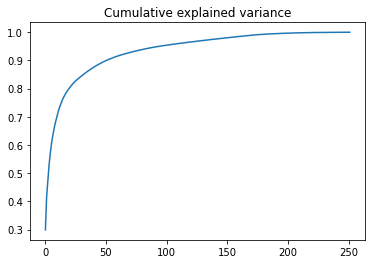

In [4]:
plt.plot(np.cumsum(explained_variance) / np.sum(explained_variance))
plt.title("Cumulative explained variance")
plt.show()

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.mean_ = mean
scaler.var = var
scaler.scale_ = scale

$$\begin{equation}
\begin{align}
x' &= \frac{x - \mu}{\sigma^2} V \\
x' &= (x - \mu) V', ~~~ V' = V / {\sigma^2} \\
x' &= x V' - \mu V'
\end{align}
\end{equation}$$

In [6]:
compnent_ix = 0

###

v = components[compnent_ix]
v_prime = v / scale

In [7]:
def plot_vec(vec, n_bins=42, size=(6, 12)):

    fig, axs = plt.subplots(len(vec) // n_bins, figsize=size)

    axs[0].bar(np.arange(n_bins), height=vec[:n_bins])
    axs[0].set_title("Transmittance")
    axs[1].bar(np.arange(n_bins), height=vec[n_bins:2*n_bins])
    axs[1].set_title("Retardation")
    axs[2].bar(np.arange(n_bins), height=vec[2*n_bins:3*n_bins])
    axs[2].set_title("Direction")
    axs[3].bar(np.arange(n_bins), height=vec[3*n_bins:4*n_bins])
    axs[3].set_title("Transmittance Sobel")
    axs[4].bar(np.arange(n_bins), height=vec[4*n_bins:5*n_bins])
    axs[4].set_title("Retardation Sobel")
    axs[5].bar(np.arange(n_bins), height=vec[5*n_bins:6*n_bins])
    axs[5].set_title("Direction Sobel")

Mean


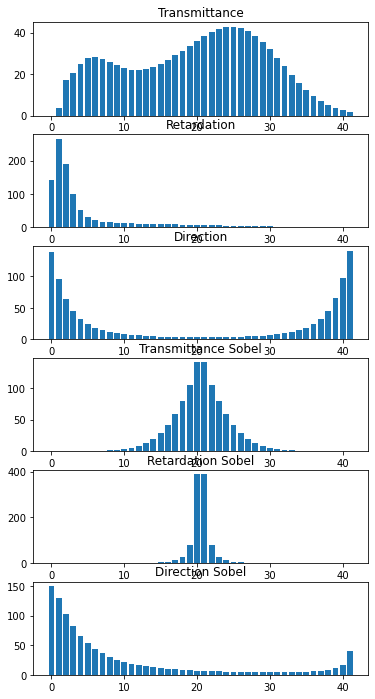

In [8]:
print("Mean")
plot_vec(mean, n_bins=n_bins)

V


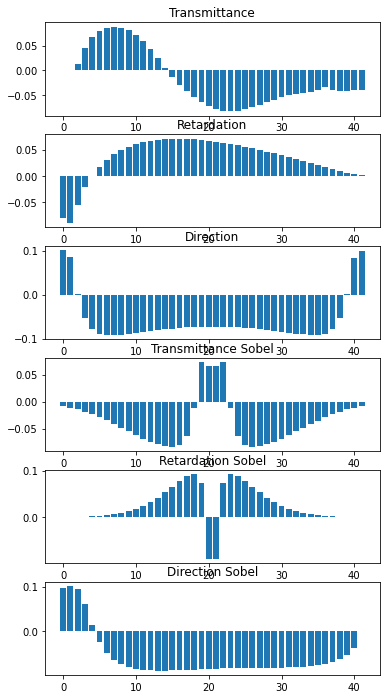

In [9]:
print("V")
plot_vec(v, n_bins=n_bins)

V'


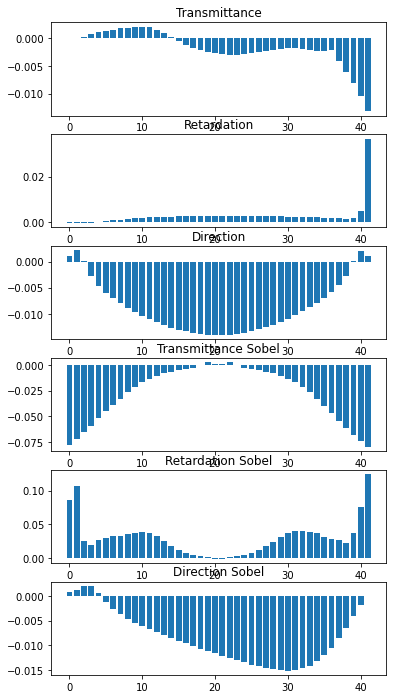

In [10]:
print("V'")
plot_vec(v_prime, n_bins=n_bins)